# Libraries import

In [1]:
import xarray as xr 


# Open Netcdf datasets via Opendap requests

**Dataset title**: Detailed observations of the spatial and temporal distribution of rainfall and drizzle in Lopik, Netherlands

[Link to dataset 1](https://data.4tu.nl/articles/_/12696887/1) 

Comments: Go to the opendap data service at the bottom of the dataset landing page and click on the link and go to the folder 2019/01/01 

In [3]:
netcdf_file_1="https://opendap.4tu.nl/thredds/dodsC/IDRA/2019/01/01/IDRA_2019-01-01_00-00_raw_data.nc" # (weights 1GB)

nectcdf_file_1_1="https://opendap.4tu.nl/thredds/dodsC/IDRA/2019/01/01/IDRA_2019-01-01_standard_range.nc" # (weights 2GB)

In [5]:
xrds = xr.open_dataset(nectcdf_file_1_1,engine="netcdf4")

## Exploring the netcdf structure

A classic NetCDF file like this one can be broken down into 3 components:
- dimensions, variables and global attributes.

- The variables can be broken down into coordinate variables and data variables. Sometimes 
they are displayed separately like here, but if you open a NetCDF file using different software the coordinate variables and data variables might be displayed together.

In [11]:
xrds

<xarray.Dataset>
Dimensions:                         (time: 205903, range: 512, scalar: 1)
Coordinates:
  * time                            (time) datetime64[ns] 2019-01-01T00:00:03...
  * range                           (range) int32 0 30 60 ... 15270 15300 15330
Dimensions without coordinates: scalar
Data variables: (12/19)
    iso_dataset                     |S64 ...
    product                         |S64 ...
    station_details                 |S64 ...
    azimuth                         (time) float32 ...
    quicklook                       (time) int16 ...
    range_resolution                (scalar) int32 ...
    ...                              ...
    equivalent_reflectivity_factor  (time, range) float32 ...
    differential_reflectivity       (time, range) float32 ...
    linear_depolarisation_ratio     (time, range) float32 ...
    radial_velocity                 (time, range) float32 ...
    spectrum_width                  (time, range) float32 ...
    differential_phase              (time, range) float32 ...
Attributes:
    title:                           IDRA Processed Data
    institution:                     Delft University of Technology (DUT)
    history:                         Polarimetric weather radar observables w...
    references:                      J. Figueras i Ventura, Design of a High ...
    Conventions:                     CF-1.4
    location:                        CESAR observatory, the Netherlands
    source:                          Ground-based polarimetric weather radar.
    example:                         http://ftp.tudelft.nl/TUDelft/irctr-rse/...
    DODS.strlen:                     1
    DODS.dimName:                    scalar
    DODS_EXTRA.Unlimited_Dimension:  time

## Attributes

Conventions is probably the most important global attribute because it tells you (and a machine) how to interpret the rest of the file. CF-1.4 refers to version 1.4 of the CF conventions, which you can find here:

https://cfconventions.org/Data/cf-conventions/cf-conventions-1.4/build/cf-conventions.html

In [10]:
xrds.attrs

{'title': 'IDRA Processed Data',
 'institution': 'Delft University of Technology (DUT)',
 'history': 'Polarimetric weather radar observables without a separation of the forward-scattering and backward-scattering effects.',
 'references': 'J. Figueras i Ventura, Design of a High Resolution X-band Doppler Polarimetric Radar, PhD Thesis, TU Delft, 2009. @ http://repository.tudelft.nl/view/ir/uuid%3Ad90b9ad6-237b-435d-9dc5-5660d9e7fbdd/',
 'Conventions': 'CF-1.4',
 'location': 'CESAR observatory, the Netherlands',
 'source': 'Ground-based polarimetric weather radar.',
 'example': 'http://ftp.tudelft.nl/TUDelft/irctr-rse/idra/',
 'DODS.strlen': 1,
 'DODS.dimName': 'scalar',
 'DODS_EXTRA.Unlimited_Dimension': 'time'}

## Dimensions



In [16]:
xrds.dims

Frozen({'time': 205903, 'range': 512, 'scalar': 1})

- time: 205903(Typically indicates how many points in time (e.g., timestamps).)
- range: 512 (Possibly represents spatial dimension, depth, height, or sensor range)
- scalar: 1	(A singleton dimension (often used for metadata or constants).)

A FrozenDict is an immutable dictionary used by xarray for safety, consistency, and performance.

You cannot modify it directly, which helps prevent accidental dimension changes in your datasets.

In other words:

- Dimensions are fixed:

- You can’t accidentally change their length.

- You have to explicitly create new datasets or slices if you want different dimensions.

## Coordinate and data variables

### Coordinate variables 

Coordinate variables in xarray (and NetCDF, following the CF conventions) are variables used to label and index data along each dimension clearly.

- Coordinate variables give context to the dimensions.

They usually represent:

- time points (e.g., timestamps)

- spatial locations (latitude, longitude, altitude, depth, distance)

- other meaningful numeric or categorical indexes

In [17]:
xrds.coords

Coordinates:
  * time     (time) datetime64[ns] 2019-01-01T00:00:03.000003844 ... 2019-01-...
  * range    (range) int32 0 30 60 90 120 150 ... 15210 15240 15270 15300 15330

*time	Each data point is associated with a precise timestamp (datetime64).E.g., measurement taken on Jan 1, 2019 at exactly 00:00:03.000003844 (nanosecond precision!), and continues onward.
*range  Represents spatial increments or distances measured in units (often meters or kilometers). E.g., Measurements at distances: 0m, 30m, 60m, up to 15330m.

In [29]:
## Look at the coordinate variables' attributes

xrds.coords['time'].attrs,xrds.coords['range'].attrs

({'standard_name': 'time', 'axis': 'T'},
 {'long_name': 'range',
  'scan_type': 'non-fixed',
  'units': 'm',
  'comment': 'Slant range (meter) to the leading edge of the range bins. The radial extension of the range bins is provided by the variable <range_resolution>.'})

### Data variables

- Data variables are the primary measurements or observations stored in your dataset.

- They are the main scientific or observational values you're analyzing.

- Each data variable is associated with one or more dimensions (and thus coordinates)

In [18]:
xrds.data_vars

Data variables:
    iso_dataset                     |S64 ...
    product                         |S64 ...
    station_details                 |S64 ...
    azimuth                         (time) float32 ...
    quicklook                       (time) int16 ...
    range_resolution                (scalar) int32 ...
    radiation_wavelength            (scalar) float32 ...
    frequency_excursion             (scalar) int32 ...
    sweep_time                      (scalar) float32 ...
    tx_power                        (time) int8 ...
    sample_size                     (scalar) int32 ...
    beam_width                      (scalar) float32 ...
    elevation_angle                 (scalar) float32 ...
    equivalent_reflectivity_factor  (time, range) float32 ...
    differential_reflectivity       (time, range) float32 ...
    linear_depolarisation_ratio     (time, range) float32 ...
    radial_velocity                 (time, range) float32 ...
    spectrum_width                  (time, range

In [30]:
xrds.data_vars["radial_velocity"].attrs

{'long_name': 'radial Doppler velocitiy for transmitted horizontal polarisation',
 'units': 'ms-1',
 'comment': 'Radial Doppler velocity estimated from the Doppler phase shift on a sweep to sweep basis.'}

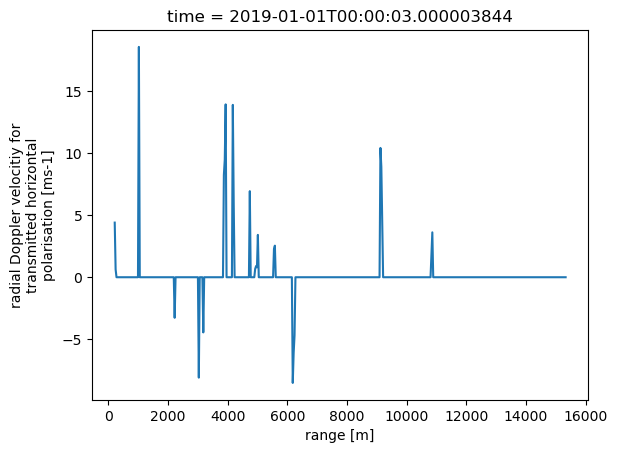

In [22]:
## Look at the coordinate variables

xrds["radial_velocity"].isel(time=0).plot()


In [32]:
xrds.data_vars["quicklook"].attrs

{'long_name': 'quicklook',
 'comment': 'Classification of the data in one minute intervals: 1 - no rain, 2 - weak rain, 3 - moderate rain, 4 - strong rain'}

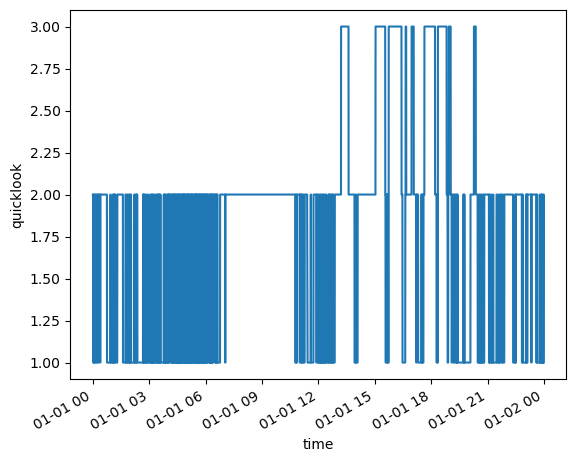

In [33]:
xrds["quicklook"].plot()

In [ ]:
## Open a netcdf dataset that does not provide any metadata (bad practice)

In [36]:
netcdf_file_2="https://opendap.4tu.nl/thredds/dodsC/data2/uuid/9604a1b0-13b6-4f23-bd6c-bb028591307c/wind-2008.nc"
xrds_2=xr.open_dataset(netcdf_file_2,engine="netcdf4")

In [37]:
xrds_2.attrs

{'title': 'DENlab wind data, raw, 2008'}

In [41]:
xrds_2

<xarray.Dataset>
Dimensions:  (time: 12040260)
Coordinates:
  * time     (time) datetime64[ns] 2007-12-31T23:59:49 ... 2008-05-20T14:20:46
Data variables:
    v_wind   (time) float32 ...
Attributes:
    title:    DENlab wind data, raw, 2008

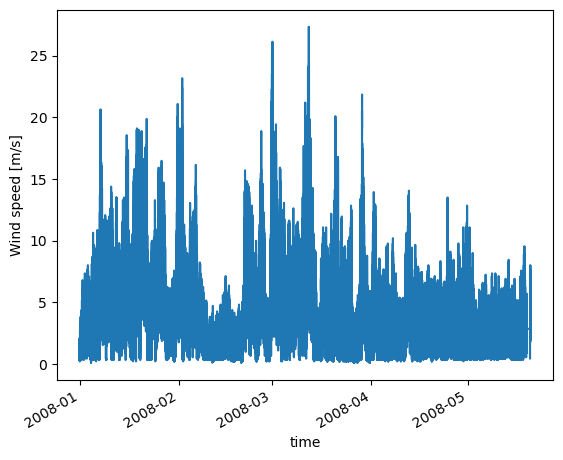

In [42]:
xrds_2["v_wind"].plot()

🚨 **Why is NOT following the CF Convention a bad practice?**

1. Limited interpretability
Without clear metadata (e.g., units, descriptions, reference systems), data is ambiguous.

Users can misunderstand or incorrectly interpret data.

2. Poor interoperability
Tools relying on conventions (e.g., visualization software, OPeNDAP servers) expect clearly defined attributes and structures.

Non-standard files cannot easily integrate into data-processing workflows.

3. Reduced Reusability and Reproducibility
Missing standard conventions → extra effort to reuse or verify results.

Others may avoid using unclear or non-standard data.

4. Reduced Findability
Convention-based metadata improves searchability in data catalogs and repositories.

✅ Benefits of CF-Conventions (Climate & Forecast)

CF Conventions specify:

- Dimensions and Coordinates clearly labeled (e.g., latitude, longitude, height, time).

- Units, standard_name, and long_name attributes clearly documented.

- Variables structured in standardized ways, easily readable by common tools (xarray, Panoply, ncview).

- Improved data interoperability, allowing easier sharing and reuse of data in science communities.

## 📚 Minimal CF-compliance checklist

| CF Element                        | Required?     | Example                                  |
|-----------------------------------|---------------|------------------------------------------|
| **Conventions global attribute**  | ✅ Mandatory  | `Conventions = "CF-1.10"`                |
| **Dimensions clearly defined**    | ✅ Mandatory  | `time`, `latitude`, `longitude`, `height`|
| **Variable attributes: units**    | ✅ Mandatory  | `units = "m s-1"`                        |
| **Variable attributes: standard_name** | ✅ Recommended | `standard_name = "northward_wind"`     |
| **Coordinate attributes: axis**   | ✅ Recommended | `axis = "T"` (for time)                 |
| **Global attributes: metadata**   | ✅ Recommended | `title`, `institution`, `history`, `source`|






## 🌟 Summary: Why CF is Essential

| Without CF ❌                  | With CF ✅                               |
|--------------------------------|-----------------------------------------|
| Ambiguous metadata             | Explicit metadata and context            |
| Difficult reuse                | Easy integration into workflows          |
| Limited interoperability       | Highly interoperable across tools        |
| Harder long-term archival      | Optimized for preservation and sharing   |

## How to adjust this dataset to fulfill the CF convention (maybe as a follow up)



In [46]:

# step 1 import libraries

import pandas as pd
import numpy as np 

# Step 2: Add latitude, longitude, height coordinates explicitly
## Assumptions: Measurements are taken at one fixed location, - The measurement device or station location doesn’t change over time,  
#If your sensor moved or if you had multiple locations, you'd define coordinates as arrays.

ds=xrds_2
ds = ds.assign_coords(
    latitude=52.0,
    longitude=4.3,
    height=10.0
)

# Step 3: Add CF-compliant attributes explicitly
# Latitude attributes , Latitude and Longitude explicitly identify the geographical location of the measurements.
ds["latitude"].attrs.update({
    "units": "degrees_north",
    "standard_name": "latitude"
})

# Longitude attributes
ds["longitude"].attrs.update({
    "units": "degrees_east",
    "standard_name": "longitude"
})

# Height attributes, Height explicitly describes the vertical position of measurement (e.g., sensor height above ground).
ds["height"].attrs.update({
    "units": "m",
    "standard_name": "height",
    "positive": "up"
})


# Time attributes
ds["time"].attrs.update({
    "standard_name": "time",
    "axis": "T",
    "long_name": "Time of measurement"
})

# Data variable attributes
ds["v_wind"].attrs.update({
    "standard_name": "northward_wind",
    "long_name": "Northward component of wind velocity"
})

# Global attributes for CF-compliance
ds.attrs.update({
    "Conventions": "CF-1.10",
    "institution": "Delft University of Technology",
    "source": "DENlab Wind Sensor",
    "history": f"Converted to CF conventions on {pd.Timestamp.now()}"
})

# Step 4: Save to a CF-compliant NetCDF file
ds.to_netcdf("denlab_wind_cf.nc")

print("CF-compliant NetCDF file created: 'denlab_wind_cf.nc'")


CF-compliant NetCDF file created: 'denlab_wind_cf.nc'


In [47]:
xr.open_dataset("denlab_wind_cf.nc")

<xarray.Dataset>
Dimensions:    (time: 12040260)
Coordinates:
  * time       (time) datetime64[ns] 2007-12-31T23:59:49 ... 2008-05-20T14:20:46
    latitude   float64 ...
    longitude  float64 ...
    height     float64 ...
Data variables:
    v_wind     (time) float32 ...
Attributes:
    title:        DENlab wind data, raw, 2008
    Conventions:  CF-1.10
    institution:  Delft University of Technology
    source:       DENlab Wind Sensor
    history:      Converted to CF conventions on 2025-04-28 15:08:38.775694